# Data Ingestion

In [1]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip


--2025-10-22 06:53:52--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.52, 16.12.36.143, 3.5.212.209, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>]  27.12M  9.32MB/s    in 2.9s    

2025-10-22 06:53:56 (9.32 MB/s) - ‘data.zip’ saved [28437489/28437489]



# Feature Engineering



In [2]:
import os
import cv2
import random

In [3]:
def extract_images(dir):
  images=[]
  labels=[]

  for folder in os.listdir(dir):
    path=os.path.join(dir,folder)
    for image in os.listdir(path):
      img=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
      img=cv2.resize(img,(32,32))
      images.append(img)
      labels.append(folder)
  data=list(zip(images,labels))
  random.shuffle(data)

  #final verdict
  images,labels=zip(*data)

  return (images,labels)







In [4]:
import numpy as np

In [5]:
def extract_images_np(dir):
  images=[]
  labels=[]

  for folder in os.listdir(dir):
    path=os.path.join(dir,folder)
    for image in os.listdir(path):
      img=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
      img=cv2.resize(img,(32,32))
      img=img.flatten()
      images.append(img)
      labels.append(folder)
  data=list(zip(images,labels))
  random.shuffle(data)

  #final verdict
  images,labels=zip(*data)

  return np.array(images),np.array(labels)



In [6]:
data_dir="/content/data/dataset"

In [7]:
images,labels=extract_images_np(data_dir)

In [8]:
print(type(images))

<class 'numpy.ndarray'>


In [9]:
import pandas as pd

In [10]:
images=np.array(images)
images=images/255.0
df_X=pd.DataFrame(images)
df_X['label']=labels
df_X.to_csv('data.csv',index=False)

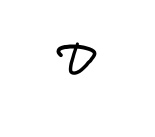

In [11]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/data/dataset/0/12643.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)


In [12]:
df=pd.read_csv('data.csv')

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mul
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,div
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mul


In [14]:
len(images)


7600

In [27]:
imagesData=[]
imagesLabel=[]

data_dir='/content/data/dataset'
imagesData, imagesLabel = extract_images(data_dir)

In [15]:
images_nnp,labels_nnp=extract_images(data_dir)

In [16]:
list(set(labels_nnp))

['mul', '0', '9', 'div', '6', 'add', '5', 'sub', '4', '3', '1', '2', '7', '8']

In [17]:
import matplotlib.pyplot as plt

In [18]:
def get_random_images_from_all():
  folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
  images = []

  for folder in folders:
      folder_path = '/content/data/dataset/' + folder
      image_files = os.listdir(folder_path)
      if image_files:
          random_image_file = random.choice(image_files)
          image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
          image = cv2.resize(image, (32, 32))
          images.append(image)

  images = np.array(images)
  images = images / 255.0
  images = np.expand_dims(images, axis=-1)
  return images



In [19]:
imagess=get_random_images_from_all()

In [20]:
len(imagess)

14

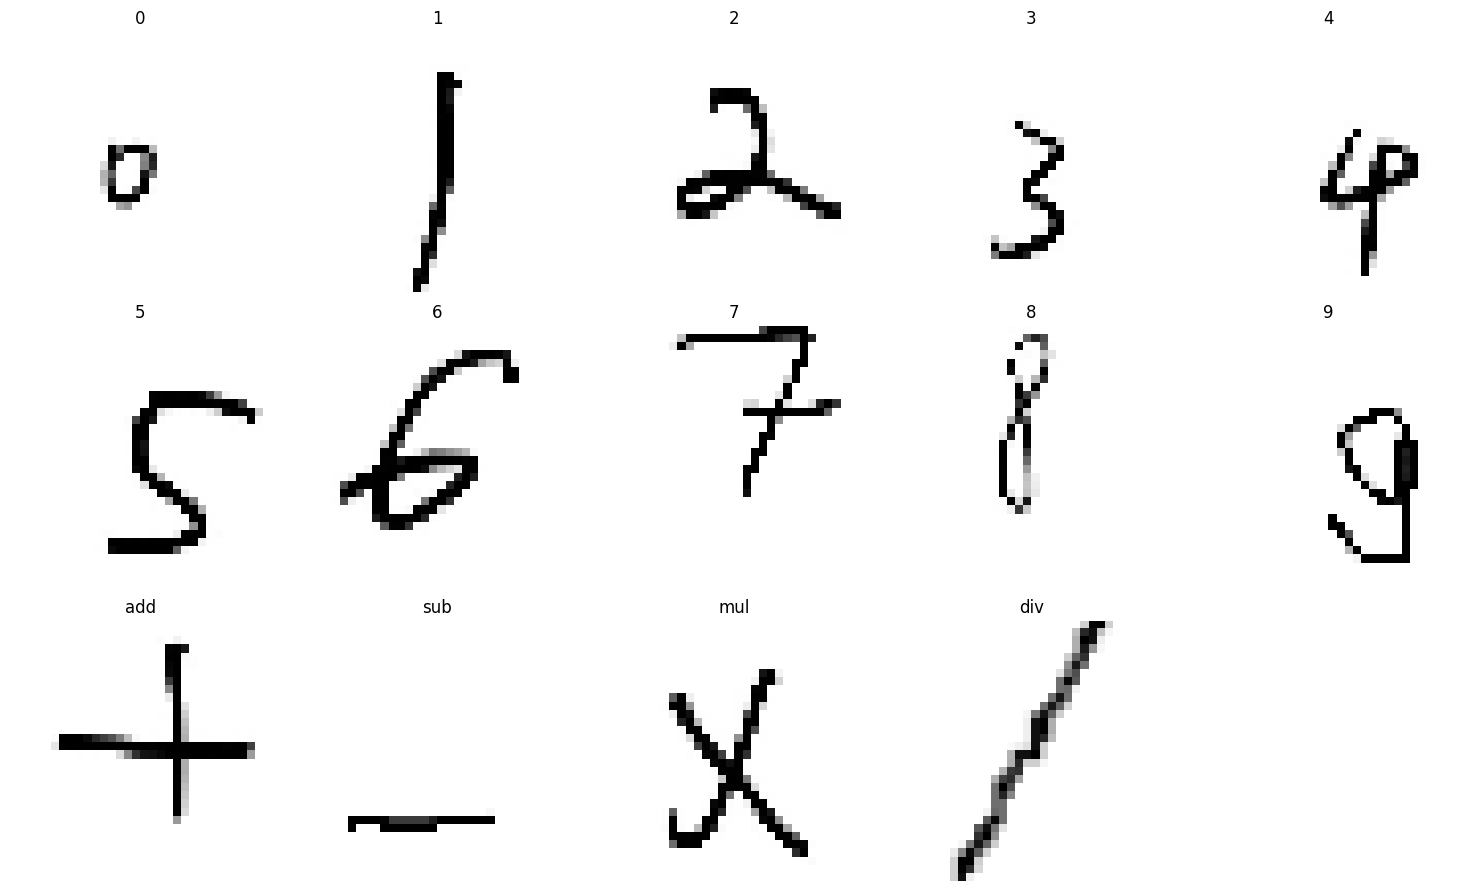

In [21]:

folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)


fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [22]:
def display_image(image,label):
  plt.imshow(image,cmap='gray')
  plt.title(label)
  plt.axis('off')
  plt.show()

5


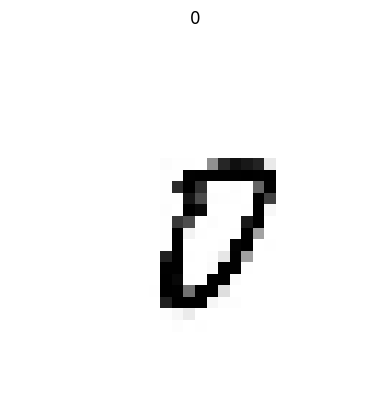

In [23]:
x=int(input())
display_image(images_nnp[x],labels_nnp[x])

### ENCODING LABELS

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder=LabelEncoder()


In [29]:
len(imagesLabel)

7600

In [30]:
y=label_encoder.fit_transform(imagesLabel)

In [32]:
# Lets also make sure we know the mapping


In [33]:
label_mapping={i:label for i ,label in enumerate(label_encoder.classes_)}

In [36]:
print(label_mapping)

{0: np.str_('0'), 1: np.str_('1'), 2: np.str_('2'), 3: np.str_('3'), 4: np.str_('4'), 5: np.str_('5'), 6: np.str_('6'), 7: np.str_('7'), 8: np.str_('8'), 9: np.str_('9'), 10: np.str_('add'), 11: np.str_('div'), 12: np.str_('mul'), 13: np.str_('sub')}


In [37]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [38]:
X.shape,Y.shape

((7600, 32, 32), (7600,))

In [40]:
# adding extra dim for color-> 1 -> grayscale
#cuz cnn expects -> (batch_size,height,width,channels)

In [42]:
X=np.expand_dims(X,axis=-1)
X.shape

(7600, 32, 32, 1)

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [47]:
len(X_train)

6080

In [48]:
len(X_test)

1520

# MODELING

### CNN MODEL


In [49]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [52]:
model=Sequential()
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,1),activation="relu"))
model.add(layers.MaxPooling2D(2,2))


model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,1),activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,1),activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(14,activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,198 (426.55 KB)

 Trainable params: 109,198 (426.55 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
import datetime

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
#
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
#

checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [68]:
hist=model.fit(X_train,
               y_train,
               epochs=20
               ,validation_data=(X_test,y_test),
               callbacks=[tensorboard,checkpoint])

Epoch 1/20
185/190 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9234 - loss: 0.2328

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9235 - loss: 0.2324 - val_acc: 0.9487 - val_loss: 0.1827
Epoch 2/20
183/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9267 - loss: 0.2167

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9267 - loss: 0.2169 - val_acc: 0.9500 - val_loss: 0.1726
Epoch 3/20
180/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9344 - loss: 0.1996

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9344 - loss: 0.1995 - val_acc: 0.9553 - val_loss: 0.1584
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9362 - loss: 0.1918

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9362 - loss: 0.1918 - val_acc: 0.9592 - val_loss: 0.1468
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9446 - loss: 0.1740 - val_acc: 0.9592 - val_loss: 0.1488
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9420 - loss: 0.1746 - val_acc: 0.9533 - val_loss: 0.1685
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9495 - loss: 0.1598 - val_acc: 0.9579 - val_loss: 0.1495
Epoch 8/20
181/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9485 - loss: 0.1555

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9483 - loss: 0.1561 - val_acc: 0.9632 - val_loss: 0.1344
Epoch 9/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9555 - loss: 0.1385 - val_acc: 0.9586 - val_loss: 0.1438
Epoch 10/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9472 - loss: 0.1515 - val_acc: 0.9625 - val_loss: 0.1410
Epoch 11/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.9563 - loss: 0.1262 - val_acc: 0.9579 - val_loss: 0.1615
Epoch 12/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9546 - loss: 0.1362

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9545 - loss: 0.1362 - val_acc: 0.9618 - val_loss: 0.1322
Epoch 13/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9645 - loss: 0.1111 - val_acc: 0.9572 - val_loss: 0.1691
Epoch 14/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9659 - loss: 0.1129 - val_acc: 0.9572 - val_loss: 0.1485
Epoch 15/20
181/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9633 - loss: 0.1118

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9633 - loss: 0.1118 - val_acc: 0.9651 - val_loss: 0.1282
Epoch 16/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9611 - loss: 0.1216 - val_acc: 0.9645 - val_loss: 0.1395
Epoch 17/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9598 - loss: 0.1132 - val_acc: 0.9638 - val_loss: 0.1364
Epoch 18/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9636 - loss: 0.1043 - val_acc: 0.9579 - val_loss: 0.1589
Epoch 19/20
179/190 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9640 - loss: 0.1110

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9642 - loss: 0.1103 - val_acc: 0.9664 - val_loss: 0.1239
Epoch 20/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9674 - loss: 0.0893 - val_acc: 0.9618 - val_loss: 0.1324


In [65]:
# %load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [67]:
# %tensorboard --logdir logs/fit


In [70]:
loss,accuracy=model.evaluate(X_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9715 - loss: 0.1020


In [73]:
model.save('cnn_model.h5')


In [78]:
def processIMG(path):

  image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  image=cv2.resize(image,(32,32))
  image=np.array(image)
  image=image/255.0
  image=np.expand_dims(image,axis=-1)
  image = np.expand_dims(image, axis=0)

  return image


In [86]:
image=processIMG("/content/data/dataset/1/10843.jpg")#


In [87]:
prediction=model.predict(image)
predicted_labels=np.argmax(prediction,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [88]:
image_title=predicted_labels

Text(0.5, 1.0, '[1]')

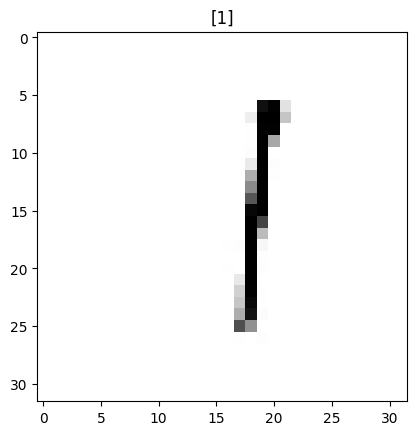

In [89]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(image_title)